In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
! pip install xlrd

In [4]:
#Importing data
df=pd.read_excel(r"Sample_Superstore.xls",header=0)

In [5]:
#printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
df.shape

(9994, 21)

In [8]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [9]:
furniture = df[df["Category"]=="Furniture"]
furniture.shape

(2121, 21)

In [10]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
#Coverting in date and time
furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

C:\Users\SHUBH\AppData\Local\Temp\ipykernel_18232\2965010587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture['Order Date']=pd.to_datetime(furniture['Order Date'])


In [12]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [13]:
furniture=furniture[['Order Date','Sales']]
furniture.shape

(2121, 2)

In [14]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [15]:
furniture = furniture.sort_values('Order Date',ascending=True)

In [16]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [17]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [18]:
furniture.tail(10)

,Order Date,Sales
6149,2017-12-28,340.7040
954,2017-12-28,78.8528
2431,2017-12-28,7.4000
1877,2017-12-29,393.5680
5457,2017-12-29,68.4600
7636,2017-12-29,258.7500
7632,2017-12-29,1207.8400
5131,2017-12-29,101.1200
7635,2017-12-29,300.9800
906,2017-12-30,323.1360


In [19]:
furniture['Order Date'].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [20]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [21]:
furniture.shape

(889, 2)

In [22]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [23]:
furniture=furniture.set_index('Order Date')

In [24]:
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [25]:
y=furniture['Sales'].resample("M").mean()

In [26]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

<function matplotlib.pyplot.show(close=None, block=None)>

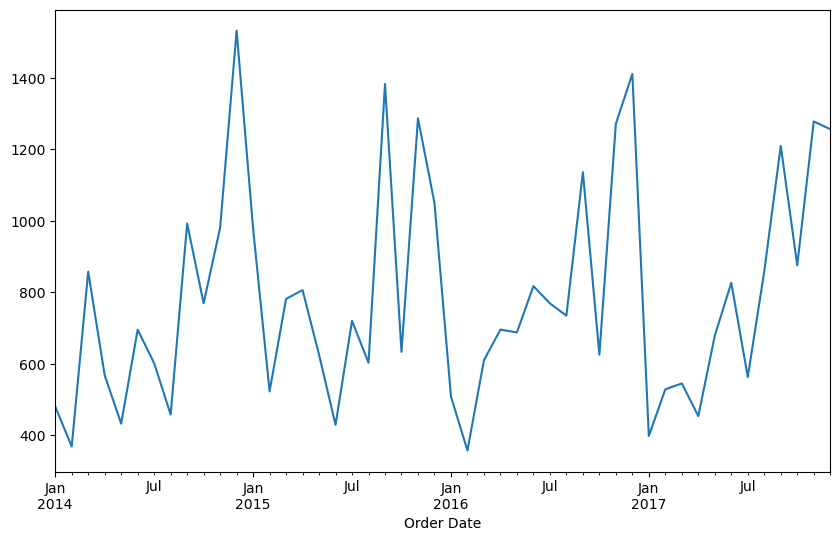

In [27]:
y.plot(figsize=(10,6))
plt.show

In [28]:
train=y.loc[ :'2016-12-31']
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [29]:
test=y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

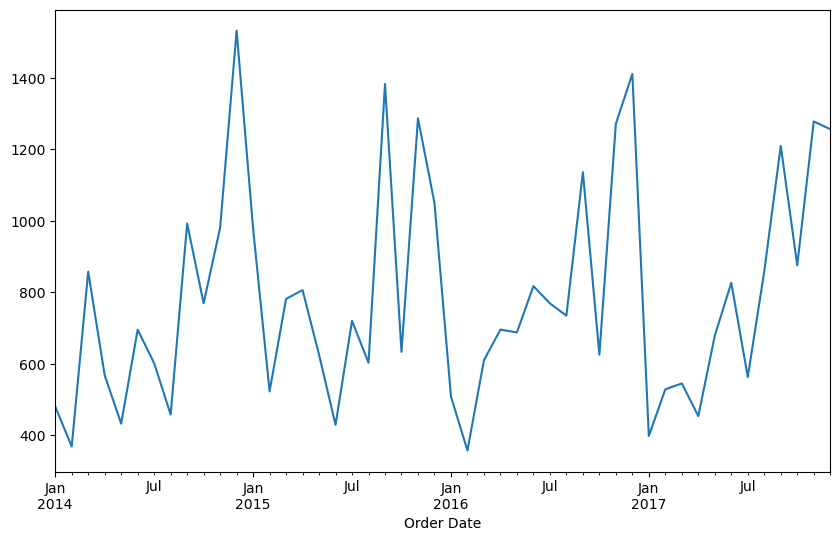

In [30]:
y.plot(figsize=(10,6))
plt.show

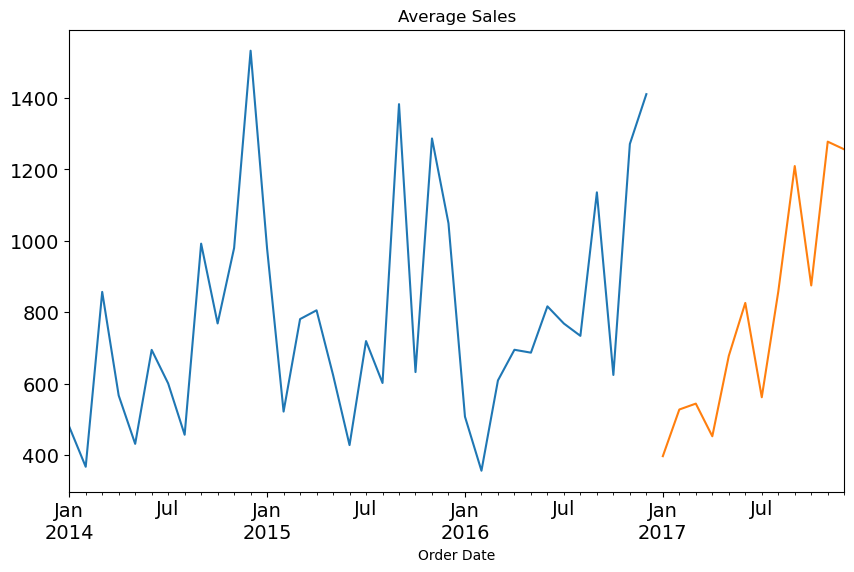

In [31]:
#data plotting
train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()

SIMPLE EXPONENTIAL SMOOTHENING MODEL

In [32]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


c:\Users\SHUBH\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


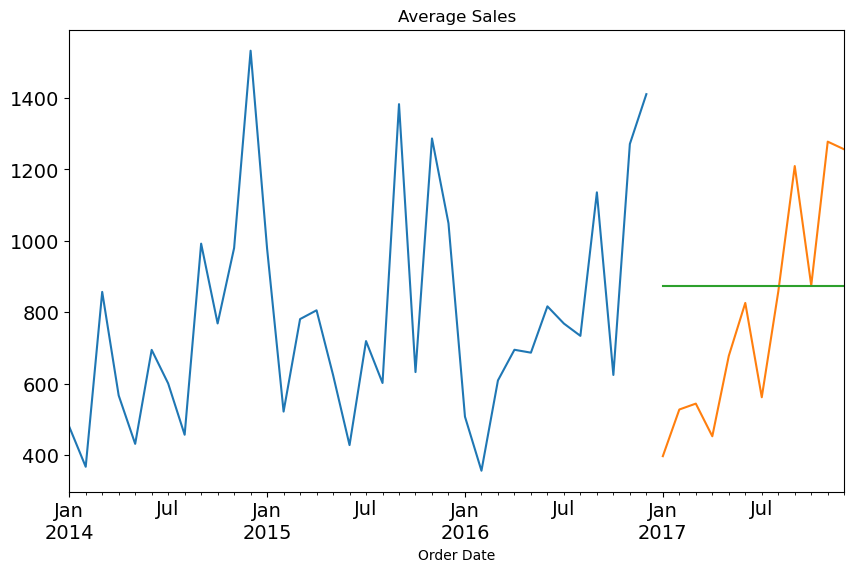

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()

#smootheing level=alpha
#alpha value should be in range of 0 to 1
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6),title='Average Sales',fontsize=14)
plt.show()


HOLT MODEL

In [34]:
#RMSE is used to compare different models with same Algo but different data/parameter
#choose the model with lowest RMSE value

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse= sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

371.3483905253285


C:\Users\SHUBH\AppData\Local\Temp\ipykernel_18232\229183785.py:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope = 0.25)
c:\Users\SHUBH\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


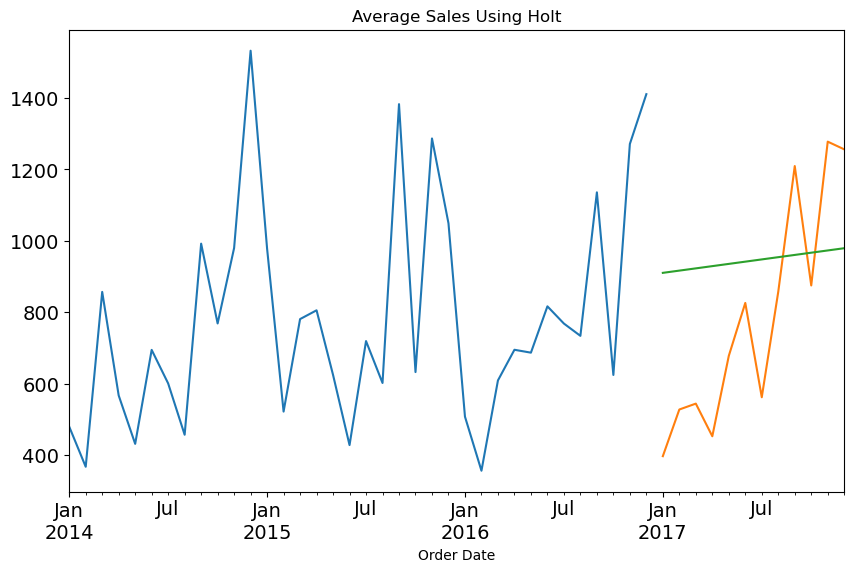

In [38]:
from statsmodels.tsa.api import Holt
Holt_df= test.copy()
#smootheing level=beta
#alpha value should be in range of 0 to 1
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp

fit1 = Holt(train).fit(smoothing_level=0.1,smoothing_slope = 0.25)
Holt_df['Holt_linear']=fit1.forecast(steps=len(test))

train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6),title='Average Sales Using Holt',fontsize=14)
plt.show()

In [39]:
fit1.aic

450.1824502866564

In [40]:
Holt_df['Holt_linear']

2017-01-31    910.633316
2017-02-28    916.902594
2017-03-31    923.171872
2017-04-30    929.441150
2017-05-31    935.710428
2017-06-30    941.979706
2017-07-31    948.248984
2017-08-31    954.518262
2017-09-30    960.787540
2017-10-31    967.056818
2017-11-30    973.326096
2017-12-31    979.595374
Freq: M, dtype: float64

HOLT WINTER MODEL

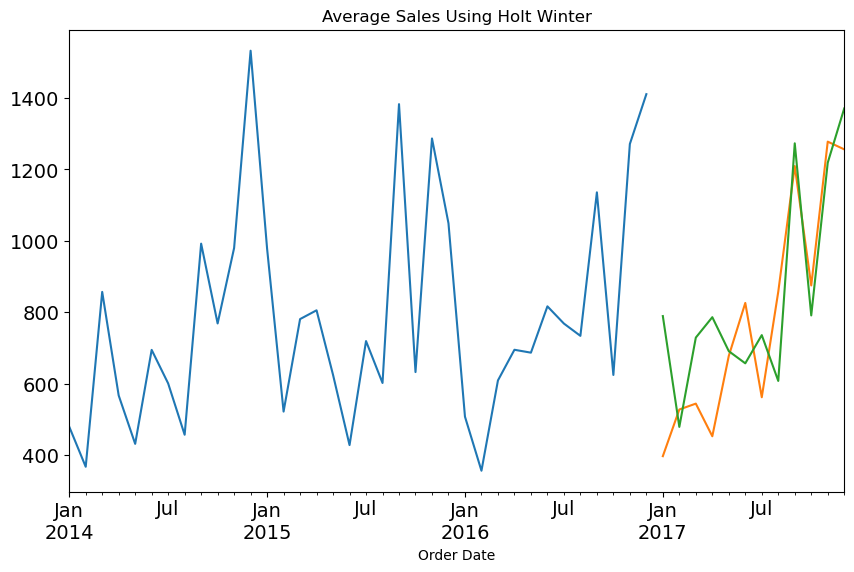

In [42]:
    from statsmodels.tsa.api import ExponentialSmoothing
    Holt_Winter_df=test.copy()
    #smoothing level gamma
    #values should be between 0 to 1
    #values close to 0 indicate that older values are very less imp compared to the recent values
    #values close to 1 indicate that older values are equally imp
    fit1 = ExponentialSmoothing(train, seasonal_periods=12, trend='add',seasonal='add').fit()
    Holt_Winter_df['Holt_Winter']=fit1.forecast(steps=len(test))
    
    train.plot(figsize=(10,6),title='Average Sales',fontsize=14)
    test.plot(figsize=(10,6),title='Average Sales',fontsize=14)
    Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6),title='Average Sales Using Holt Winter',fontsize=14)
    plt.show()
    
    
    

UPCOMING YEAR

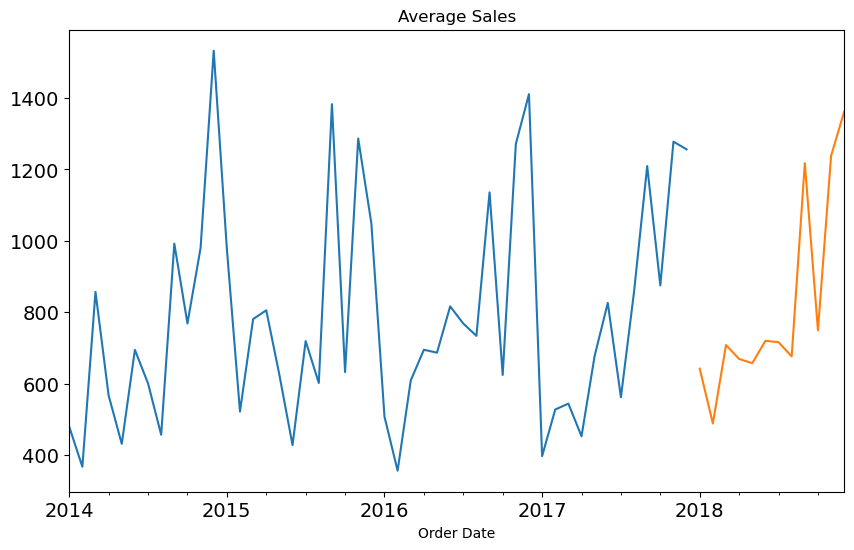

In [43]:
    from statsmodels.tsa.api import ExponentialSmoothing
    Holt_Winter_df=test.copy()
    #smoothing level gamma
    #values should be between 0 to 1
    #values close to 0 indicate that older values are very less imp compared to the recent values
    #values close to 1 indicate that older values are equally imp
    fit1 = ExponentialSmoothing(y, seasonal_periods=12, trend='add',seasonal='add').fit()
    #Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [47]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx",index=True)